# Simple Linear Regression - Delivery Time
Q1) Delivery_time -> Predict delivery time using sorting time Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [9]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import sklearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [6]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
ls

 Volume in drive C is OS
 Volume Serial Number is 9078-B719

 Directory of C:\Users\ritij\OneDrive\Desktop\Assignment All

07-09-2022  17:28    <DIR>          .
07-09-2022  17:28    <DIR>          ..
02-09-2022  20:49    <DIR>          .ipynb_checkpoints
02-09-2022  20:39    <DIR>          Assignment 1 to 3
18-06-2022  23:44            61,219 Assignment -2_set_Q1.ipynb
29-06-2022  20:40           133,099 Assignment.ipynb
03-07-2022  17:28             7,659 Assignment2 _set2_Q1.ipynb
08-08-2022  17:00             4,268 Assignment-2-set-3-Q5.ipynb
08-08-2022  17:31             4,226 Assignment-2-set4-Q3.ipynb
08-08-2022  18:56            35,170 Assignment-3-Hypothesis Testing.ipynb
08-08-2022  17:41                87 BuyerRatio (1).csv
27-04-2022  15:06             3,529 Cars.csv
08-08-2022  17:40            13,423 Costomer+OrderForm (1).csv
08-08-2022  18:05               525 Cutlets (1).csv
02-09-2022  20:46               198 delivery_time (1).csv
08-08-2022  18:32             3,487 La

In [8]:
dt = pd.read_csv('delivery_time (1).csv')

In [9]:
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
dt.shape

(21, 2)

In [11]:
dt.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [12]:
dt = dt.rename({'Delivery Time':'dtime','Sorting Time':'stime'},axis=1)


In [13]:
dt.head(5)

,dtime,stime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


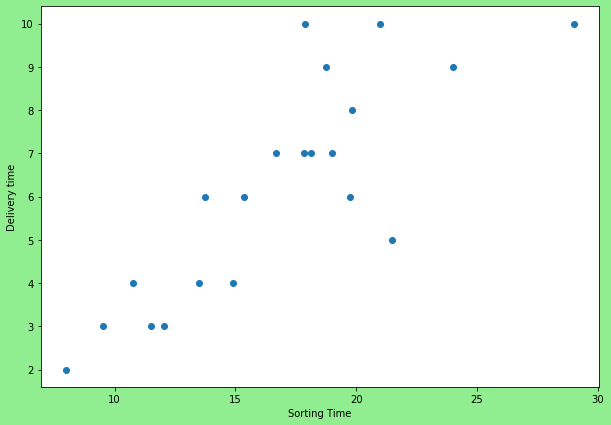

In [48]:
plt.figure(figsize=(10,7) ,facecolor='lightgreen')
plt.scatter(dt.dtime,dt.stime)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery time')
plt.show()

In [49]:
dt.corr()

,dtime,stime
dtime,1.000000,0.825997
stime,0.825997,1.000000


In [50]:
dt.shape

(21, 2)

# Creating model with SKLEARN

In [27]:
dt

,dtime,stime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [58]:
lm = LinearRegression()

X = dt["stime"].values.reshape(-1,1)
Y = dt["dtime"].values.reshape(-1,1)

lm.fit(X,Y)


LinearRegression()

In [59]:
X

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [60]:
Y

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [78]:
print(lm.coef_)
print(lm.intercept_)


[[1.6490199]]
[6.58273397]


In [82]:
lm.predict(X)

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

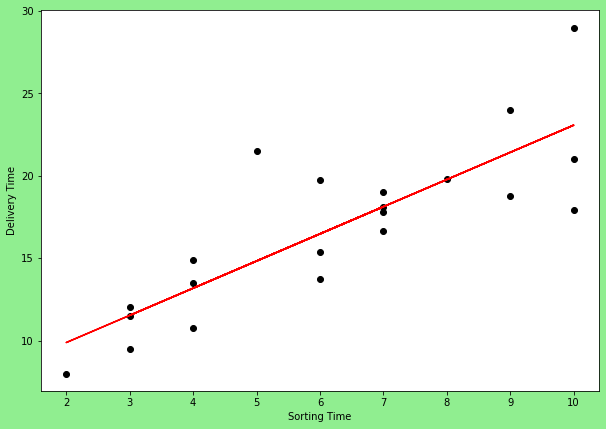

In [81]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dt.stime,dt.dtime,color="black");
plt.plot(dt.stime,dt.stime*lm.coef_[0]+lm.intercept_ ,color="red");
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.show()

# model validation

In [87]:
pred_train_lm =lm.predict(X)
r2_score(dt["dtime"],pred_train_lm)

0.6822714748417231

# model with statsmodels

In [88]:
dt

,dtime,stime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [90]:
first_model=smf.ols("dtime~stime",data=dt).fit()

In [93]:
first_model.params

Intercept    6.582734
stime        1.649020
dtype: float64

In [97]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dtime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        18:25:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
stime          1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

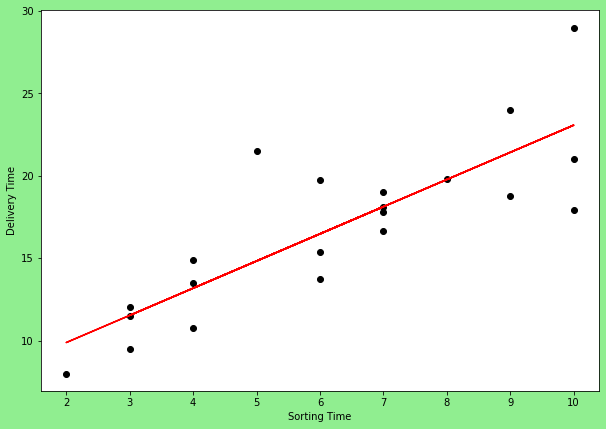

In [98]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dt.stime,dt.dtime,color="black");
plt.plot(dt.stime,dt.stime*lm.coef_[0]+lm.intercept_ ,color="red");
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.show()

In [101]:
model2 = smf.ols('dtime~np.log(stime)',data =dt).fit()

In [103]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dtime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           2.64e-06
Time:                        18:31:04   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(stime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
model3 = smf.ols('np.log(dtime)~stime', data = dt).fit()

In [105]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(dtime)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           1.59e-06
Time:                        18:32:25   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
stime          0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
dt["stime_sq"] = dt.stime**2
model_qaud = smf.ols("np.log(dtime)~stime+stime_sq",data = dt).fit()
model_qaud.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(dtime)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           2.20e-06
Time:                        18:40:59   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
stime          0.2659      0.080      3.315      0.004       0.097       0.434
stime_sq      -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Simple Linear Regression - Salary_hike
Q2) Salary_hike -> Build a prediction model for Salary_hike Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [19]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import sklearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [21]:
ls

 Volume in drive C is OS
 Volume Serial Number is 9078-B719

 Directory of C:\Users\ritij\OneDrive\Desktop\Assignment All

09-09-2022  16:10    <DIR>          .
09-09-2022  16:10    <DIR>          ..
02-09-2022  20:49    <DIR>          .ipynb_checkpoints
02-09-2022  20:39    <DIR>          Assignment 1 to 3
18-06-2022  23:44            61,219 Assignment -2_set_Q1.ipynb
29-06-2022  20:40           133,099 Assignment.ipynb
03-07-2022  17:28             7,659 Assignment2 _set2_Q1.ipynb
08-08-2022  17:00             4,268 Assignment-2-set-3-Q5.ipynb
08-08-2022  17:31             4,226 Assignment-2-set4-Q3.ipynb
08-08-2022  18:56            35,170 Assignment-3-Hypothesis Testing.ipynb
08-08-2022  17:41                87 BuyerRatio (1).csv
27-04-2022  15:06             3,529 Cars.csv
08-08-2022  17:40            13,423 Costomer+OrderForm (1).csv
08-08-2022  18:05               525 Cutlets (1).csv
02-09-2022  20:46               198 delivery_time (1).csv
08-08-2022  18:32             3,487 La

In [22]:
df=pd.read_csv("salary_data.csv")

In [26]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [25]:
df.shape

(30, 2)

In [27]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [31]:
df.dtypes

YearsExperience    float64
Salary               int64
dtype: object

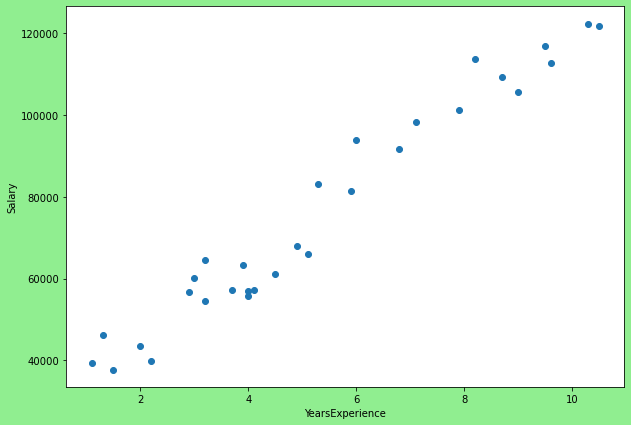

In [39]:
plt.figure(figsize=(10,7) ,facecolor='lightgreen')
plt.scatter(df.YearsExperience,df.Salary)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [40]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [41]:
df.shape

(30, 2)

# Creating model with SKLEARN

In [47]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [58]:
lm = LinearRegression()

X=df["YearsExperience"].values.reshape(-1,1)
Y=df["Salary"].values.reshape(-1,1)
  
lm.fit(X,Y)

LinearRegression()

In [66]:
df["YearsExperience"]

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [67]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [73]:
Y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]], dtype=int64)

In [74]:
print(lm.coef_)
print(lm.intercept_)

[[9449.96232146]]
[25792.20019867]


In [75]:
lm.predict(X)

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

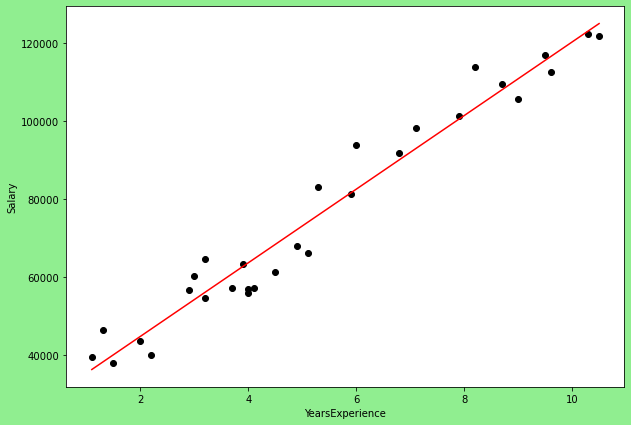

In [81]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(df.YearsExperience,df.Salary,color="black");
plt.plot(df.YearsExperience,lm.predict(X),color="red");
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.show()

In [82]:
pred_train_lm=lm.predict(X)
r2_score(df["Salary"],pred_train_lm)

0.9569566641435086